<a href="https://colab.research.google.com/github/Richard2735/Python/blob/master/Cap3_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar funcion fetch_openML desde Scikit-learn y cargar MNIST (como matriz Numpy por ser imagenes (frame=false))
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Extraer las características (X) y las etiquetas (y) del conjunto de datos MNIST
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
type(X)

numpy.ndarray

In [ ]:
  X.shape     #tiene 70000 filas con 784 caracteristicas (28x28 pixeles)

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape #tiene 70000 datos

(70000,)

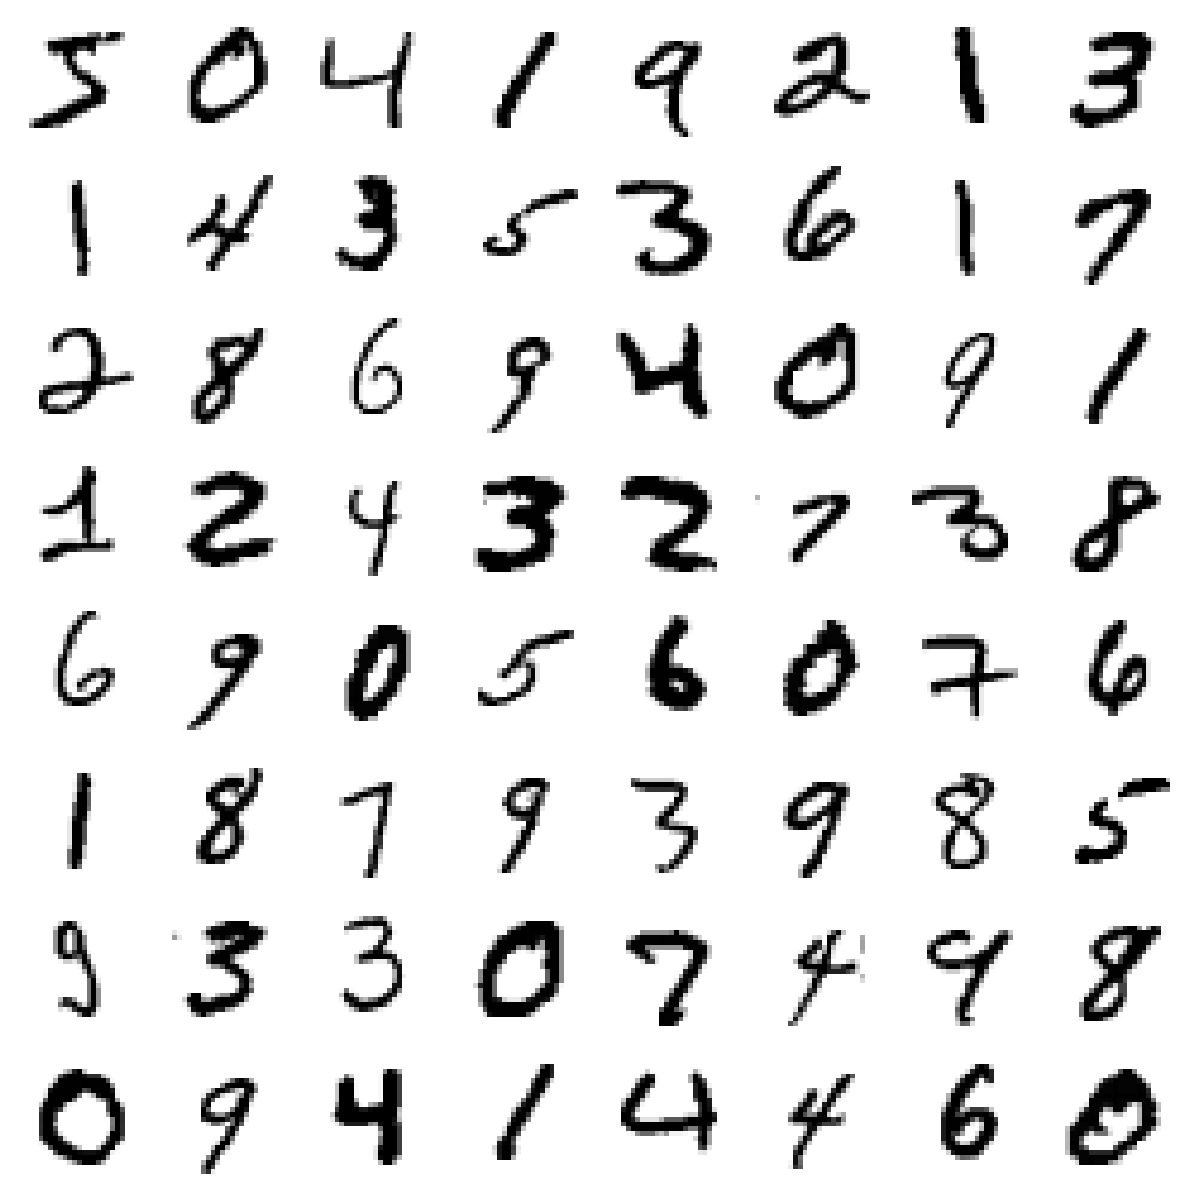

In [ ]:
import matplotlib.pyplot as plt

# Mostrar una muestra de las imágenes sin etiquetas
plt.figure(figsize=(12, 12))
for index, image in enumerate(X[:64]):  # Mostramos las primeras 64 imágenes
    plt.subplot(8, 8, index + 1)  # Disposición de subgráficos de 8x8
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.axis("off")
plt.tight_layout()  # Ajustar el diseño para que los subgráficos no se superpongan
plt.show()

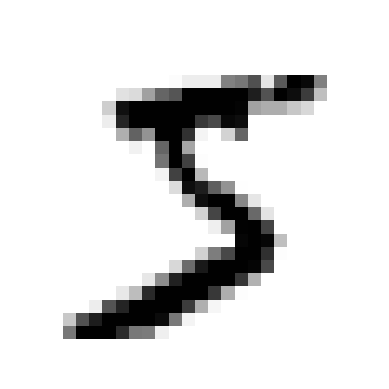

In [ ]:
# Definir la función para mostrar una imagen
def plot_digit(image_data):
    image = image_data.reshape(28, 28) # Remodelar la imagen a 28x28 píxeles
    plt.imshow(image, cmap="binary") #Binario para mostrar solo colores blanco y negro)
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit) #muestra como figura separada
plt.show()

In [ ]:
#Ver que dice la etiqueta (label):
y[0]

'5'

In [ ]:
# Separar datos de entrenamiento (60,000) vs. testeo (10,000):
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Entrenando un clasificador binario

In [ ]:
#Escogemos que vamos a entrenar el numero 5
y_train_5 = (y_train == '5') # Verdadero para el numero 5, Falso para todos los demas
y_test_5 = (y_test == '5')

In [ ]:
#Importar SGDClassifier de Scikit.learn para clasificar los datos de entrenamiento y sus respectivas etiquetas
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) #usamos fit para entrenar el clasificador

SGDClassifier(random_state=42)

In [ ]:
#Utilizar el clasificador sgd_clf para el ejemplo some_digit
sgd_clf.predict([some_digit])

array([ True])

#MEDIDAS DE DESEMPEÑO
## 3.1) Medición de la precisión por validación cruzada

In [ ]:
# Utilizamos croos_val_ccore de Scikit learn para ver la precisión de detectar el número 5
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #divide el conjunto de entrenamiento en 3 partes y se utiliza la precisión (accuracy)

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# Utilizamos DummyClassifier de Scikit_learn para detectar cuantos falsos hay y encontrar la precicion
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #Si dice FAlse, sginifica que no hay 5 detectados

False


In [ ]:
#Precisión del modelo:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
#Utilizando StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # añadir shuffle=True si el dataset no está al azar

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


## 3.2) Matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

## 3.3) Precisión y Recuperación


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

## 3.4) Curva ROC

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

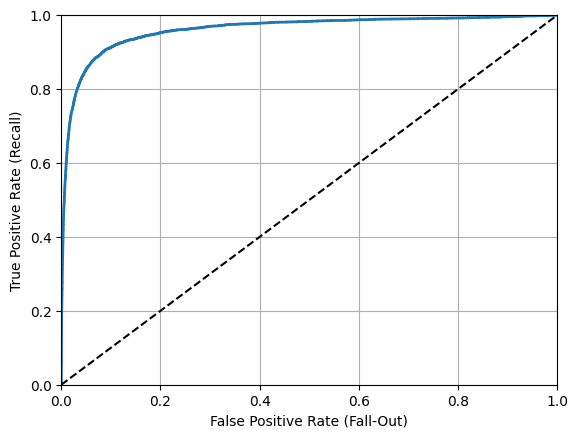

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    # Adding axis labels and grid
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)
    # Establecer los límites de los ejes para que comiencen en 0
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

# Suponiendo que tienes los valores de fpr y tpr, los usarías así:
plot_roc_curve(fpr, tpr)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


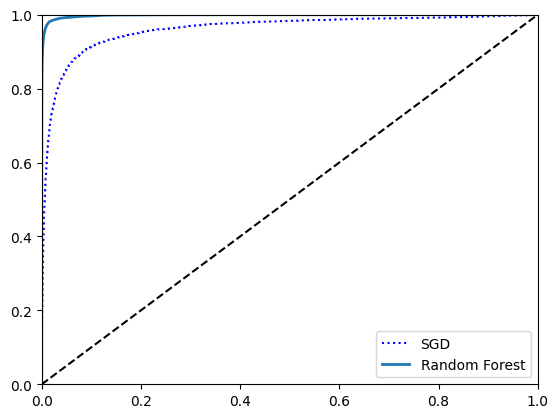

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'fpr' y 'tpr' son para el clasificador SGD y
# 'fpr_forest' y 'tpr_forest' son para el clasificador de Random Forest
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')  # Dibuja la línea punteada diagonal
plt.legend(loc="lower right")  # Asegura que la leyenda esté en la parte inferior derecha
# Establecer los límites de los ejes para que comiencen en 0
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Ahora puedes usar roc_auc_score con tus datos
roc_auc = roc_auc_score(y_train_5, y_scores_forest)

print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9983436731328145
